In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Prepare DataSet of Gala

In [14]:
df_gala = pd.read_csv("../../../DataSet/Gala/gala.csv")
df_gala["Date"] = pd.to_datetime(df_gala["Date"], format="%d/%m/%Y")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Gala    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


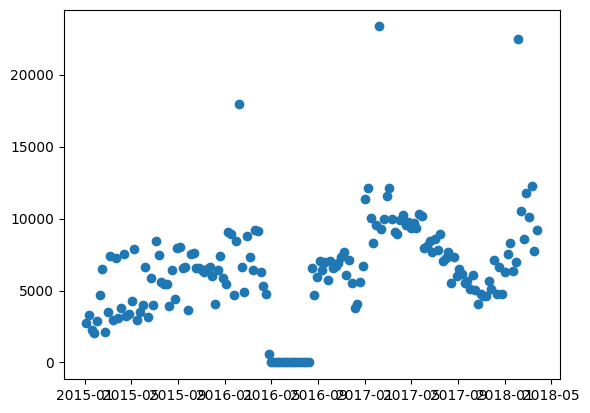

In [15]:
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

filter that number of apples are more than 1000 and less than 15000

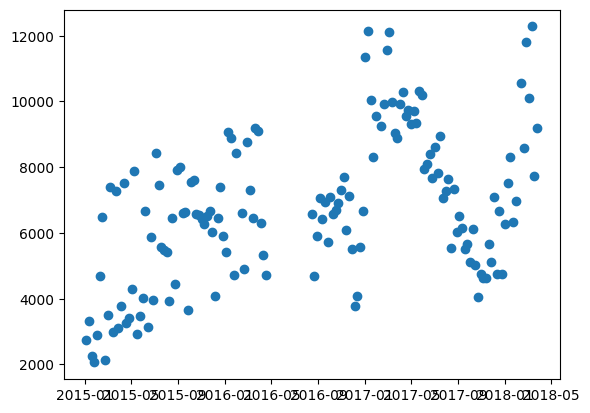

In [16]:
df_gala = df_gala[df_gala["Gala"] <= 15000]
df_gala = df_gala[df_gala["Gala"] >= 1000]
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

In [17]:
def createSequenceToOneDataSet(r, data:pd.DataFrame, name):  # Create Sequence DataSet
    df = data.copy()
    i = 1
    
    while i < r:
        df[f'x{i}'] = df[name].shift(-i)
        i += 1

    if i == r:
        df['y'] = df[name].shift(-i)

    df = df.dropna(axis=0)
    
    # change type of data
    for i in range(1, r):
        df[f'x{i}'] = df[f'x{i}'].astype("int64")
        
    df['y'] = df["y"].astype("int64")
    
    return df

df_gala = createSequenceToOneDataSet(5, df_gala, "Gala")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 163
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    145 non-null    datetime64[ns]
 1   Gala    145 non-null    int64         
 2   x1      145 non-null    int64         
 3   x2      145 non-null    int64         
 4   x3      145 non-null    int64         
 5   x4      145 non-null    int64         
 6   y       145 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.1 KB


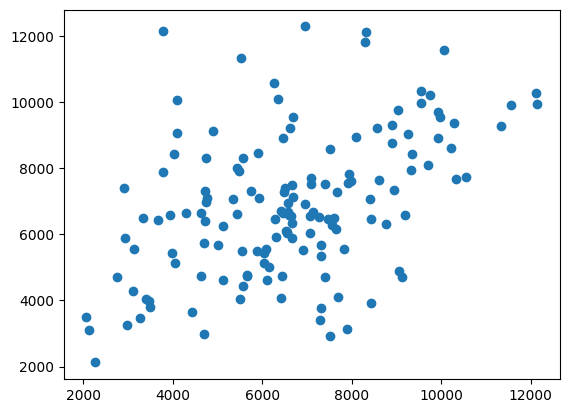

In [18]:
plt.scatter(df_gala["Gala"], df_gala["y"])
plt.show()

In [19]:
x = np.array(df_gala.drop(columns="y"))
y = np.array(df_gala.drop(columns=["Gala", "x1", "x2", "x3", "x4"]))

# xScaler = StandardScaler().fit(x)
# yScaler = StandardScaler().fit(y)
# x = xScaler.transform(x)
# y = yScaler.transform(y)

In [20]:
# def findBestRandomState(r,t, x, y):
#     xScaler = StandardScaler().fit(x)
#     yScaler = StandardScaler().fit(y)
    
#     x = xScaler.transform(x)
#     y = yScaler.transform(y)
    
#     random = 0
#     a = 100

#     model = LinearRegression()
#     for _ in range(r,t):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
#         model.fit(x_train, y_train)

#         y_predict = model.predict(x_test)
#         if (buff := mean_absolute_error(y_test, y_predict)) < a:
#             a = buff
#             random = _
#     print(a, random)

# findBestRandomState(0, 100000, x[:, 1:], y[:, 1:])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=58307)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

### Train model of Gala apples

In [22]:
model = LinearRegression()
model.fit(x_train[:, 1:], y_train[:, 1:])

LinearRegression()

In [23]:
y_predict = model.predict(x_test[:, 1:])
print(f"Mean Absolute Error: {mean_absolute_error(y_test[:, 1:], y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test[:, 1:], y_predict)}")
print(f"The R2 score: {r2_score(y_test[:, 1:], y_predict)}")

Mean Absolute Error: 745.8746171880581
The Mean Square Error: 934108.3127124157
The R2 score: 0.7243889150106665


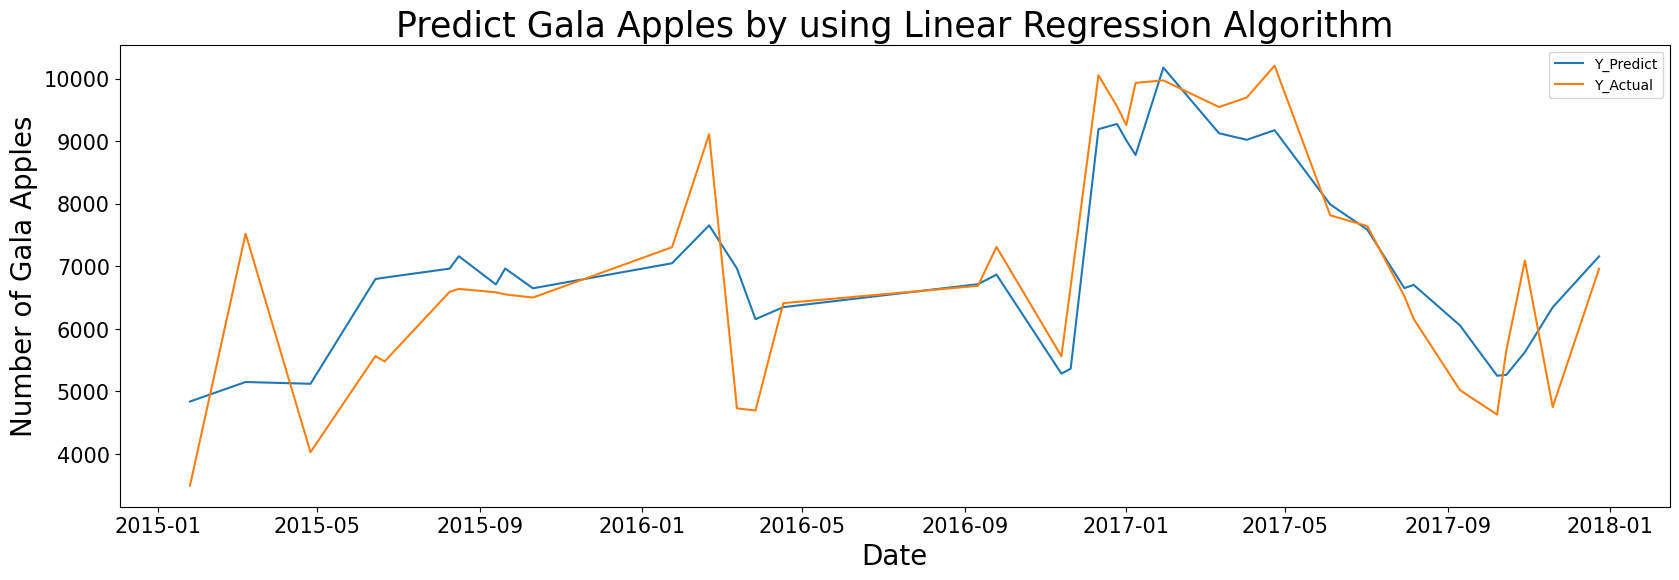

In [24]:
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Gala Apples", fontsize=20)
plt.title("Predict Gala Apples by using Linear Regression Algorithm", fontsize=25)
plt.legend()
plt.show()

---